In [1]:
# Homework 05
# Vance Nygard's solutions.
## Due Tuesday, March 29th

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import shapely.geometry
import shapely.ops

from scipy import spatial
from mpl_toolkits.basemap import Basemap


ImportError: No module named 'shapefile'

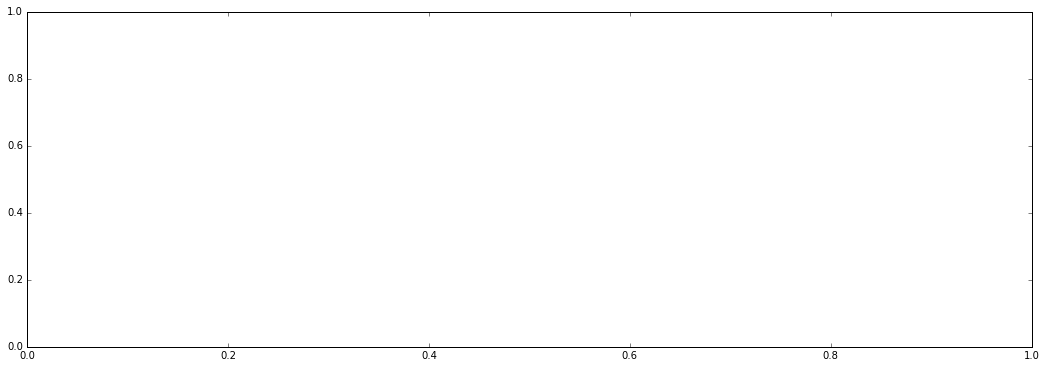

In [44]:
##Problem 1
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111) 
m = Basemap(llcrnrlon=-150.,llcrnrlat=20.,
        urcrnrlon=-50.,urcrnrlat=50.,
        rsphere=(6378137.00,6356752.3142),
        resolution='l',projection='merc',
        lat_0=40.,lon_0=-100.,lat_ts=20.)
ax = fig.add_subplot(111)
m.readshapefile('states_21basic/states', 'states')
m.fillcontinents();

latLAX = 33.9425
lonLAX = -118.4081
latEWR = 40.6925
lonEWR = -74.1686

pathx, pathy = m.gcpoints(lonLAX, latLAX, lonEWR, latEWR, 120)
ax.plot(pathx,pathy)

states = shapely.ops.linemerge(m.states)
line = shapely.geometry.LineString(zip(pathx, pathy))

polys = []
for poly in states:
    if poly.intersects(line):
        color = 'r'
    else:
        color = 'k'
    coords = shapely.ops.cascaded_union(poly).coords[:]
    x, y = zip(*coords)
    plt.fill(x, y, color=color, alpha=0.3)
    
x, y = zip(*line.coords[:])
plt.plot(x, y, '--r', lw = 3)
plt.gca().set_aspect(1.0)

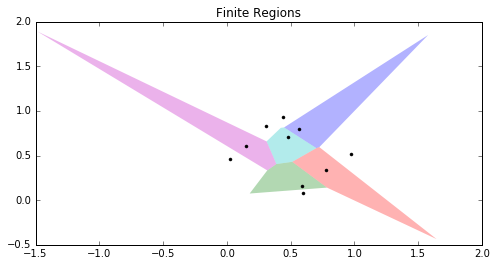

In [7]:
##Problem 2
arr = np.array([[ 0.77354201,  0.34072038],
                [ 0.43807549,  0.93001924],
                [ 0.5624092 ,  0.79438991],
                [ 0.02536295,  0.46180244],
                [ 0.59533179,  0.07522803],
                [ 0.47867418,  0.70302822],
                [ 0.30371564,  0.83135442],
                [ 0.5856915 ,  0.16340903],
                [ 0.14700491,  0.60268997],
                [ 0.97098631,  0.51692456]])

vor = spatial.Voronoi(arr)

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)  
ax.set_title('Finite Regions')
plt.plot(arr[:, 0], arr[:, 1], '.k')

for indices in vor.regions:
    if not indices: continue     # check for empty regions
    if -1 in indices: continue   # region includes a vertex out of the diagram (the region goes to infinity)
    plt.fill(vor.vertices[indices, 0], vor.vertices[indices, 1], edgecolor='none', alpha=0.3)

In [9]:
arr


array([[ 0.77354201,  0.34072038],
       [ 0.43807549,  0.93001924],
       [ 0.5624092 ,  0.79438991],
       [ 0.02536295,  0.46180244],
       [ 0.59533179,  0.07522803],
       [ 0.47867418,  0.70302822],
       [ 0.30371564,  0.83135442],
       [ 0.5856915 ,  0.16340903],
       [ 0.14700491,  0.60268997],
       [ 0.97098631,  0.51692456]])

In [ ]:
# for item in arr:
#     dot = shapely.geometry.Point(item)
#     points.append(dot)
#     dialated.append(dot.buffer(0.001))

# x, y = zip(*line.coords[:])
# plt.plot(x, y, '--k')

In [41]:
dialated = []

points_001 = shapely.geometry.MultiPoint(arr).buffer(0.001)
points_01 = shapely.geometry.MultiPoint(arr).buffer(0.01)
points_1 = shapely.geometry.MultiPoint(arr).buffer(0.1)

overlap_001 = shapely.ops.linemerge(points_001.boundary)

intersection_001 = [poly.intersects(vor.regions) for poly in overlap_001]

# vor.vertices[indices, 0], vor.vertices[indices, 1]

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131)  
ax.set_title('0.001 Buffer Zone')
plt.plot(arr[:, 0], arr[:, 1], '.k')
plt.fill(*intersection_001, alpha=0.2)

ax2 = fig.add_subplot(132)  
ax2.set_title('0.01 Buffer Zone')
plt.plot(arr[:, 0], arr[:, 1], '.k')

ax3 = fig.add_subplot(133)  
ax3.set_title('0.1 Buffer Zone')
plt.plot(arr[:, 0], arr[:, 1], '.k')

AttributeError: 'list' object has no attribute '_geom'

In [5]:
poly = []

for indices in vor.regions:
    if not indices: continue
    if -1 in indices: continue
    poly.append(zip(vor.vertices[indices, 0], vor.vertices[indices, 1]))

bodies = shapely.geometry.Polygon(poly)

TypeError: object of type 'zip' has no len()